In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from numpy import mean
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [2]:
data_test = pd.read_csv('C:/ML_Lab2/application_test.csv', index_col='SK_ID_CURR')
data = pd.read_csv('C:/ML_Lab2/application_train.csv', index_col='SK_ID_CURR')

In [3]:
pd.set_option('display.max_rows', 100)

In [4]:
data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0


In [5]:
pd.get_option("display.max_rows")

100

In [6]:
pd.options.display.max_rows

100

In [7]:
data_test.head(30)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0


In [8]:
missing_value = data.isnull().sum()
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({
	'count_missing': missing_value,
	'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,count_missing,percent_missing
TARGET,0,0.000000
HOUR_APPR_PROCESS_START,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
REG_CITY_NOT_LIVE_CITY,0,0.000000
...,...,...
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
COMMONAREA_MODE,214865,69.872297
COMMONAREA_AVG,214865,69.872297


In [9]:
categorical_features = set(data.select_dtypes(include=['object']).columns)
categorical_features

{'CODE_GENDER',
 'EMERGENCYSTATE_MODE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'WALLSMATERIAL_MODE',
 'WEEKDAY_APPR_PROCESS_START'}

In [10]:
continuous_features = set()
discrete_features = set()
for column in data.columns:
    if column not in categorical_features:
        if data[column].nunique() <= 10:
            discrete_features.add(column)
        else:
            continuous_features.add(column)
numerical_features = discrete_features | continuous_features

In [11]:
continuous_features

{'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'HOUR_APPR_PROCESS_START',
 'LANDAREA_AVG',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_A

In [12]:
discrete_features

{'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_EMAIL',
 'FLAG_EMP_PHONE',
 'FLAG_MOBIL',
 'FLAG_PHONE',
 'FLAG_WORK_PHONE',
 'LIVE_CITY_NOT_WORK_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'TARGET'}

In [13]:
def plot_categorical_discrete(data, col, x_angle=0, title='', size=[12, 4]):
    plot_data = data[col].value_counts()
    plt.figure(figsize=size)
    sns.barplot(x=plot_data.index, y=plot_data.values)
    plt.xticks(rotation=x_angle)
    plt.title(title)
    plt.show()
    
def plot_continuous(data, col, type_='hist', title='', size=[12, 4]):
    plt.figure(figsize=size)
    plt.title(title)
    if type_ == 'hist':
        sns.histplot(data[col].dropna(), bins=50, kde=True, color="g")
    elif type_ == 'box':
        sns.boxplot(data[col].dropna())
    plt.show()

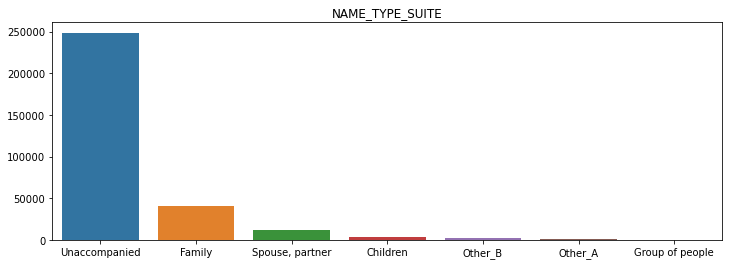

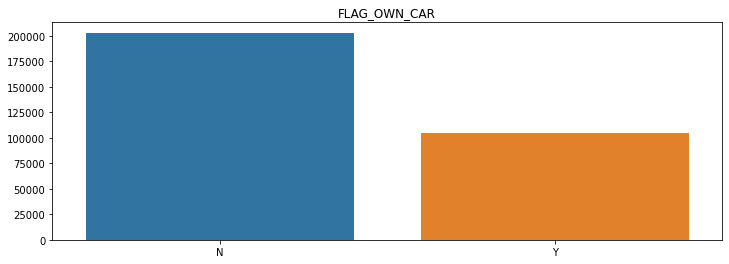

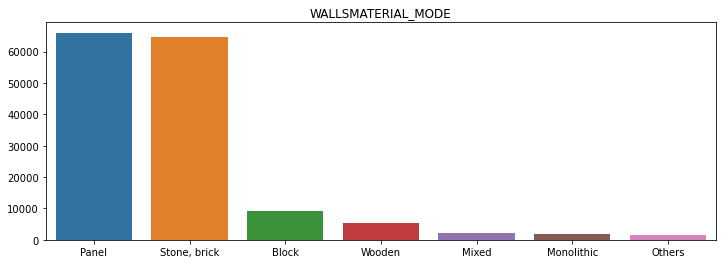

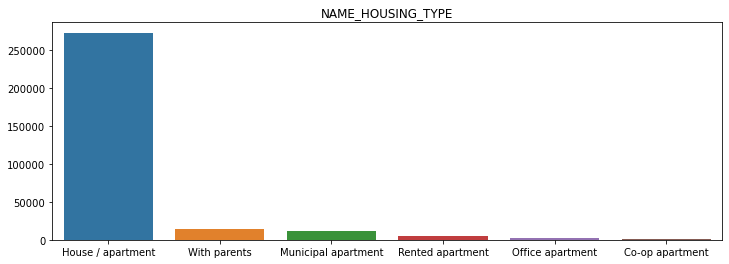

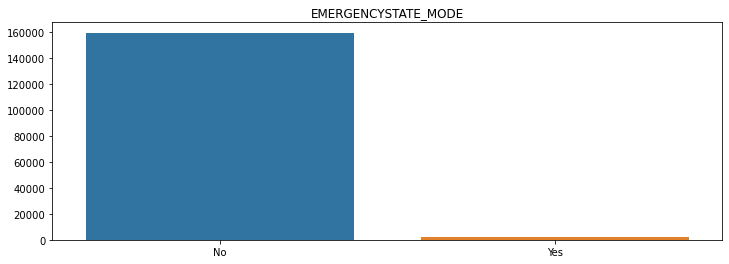

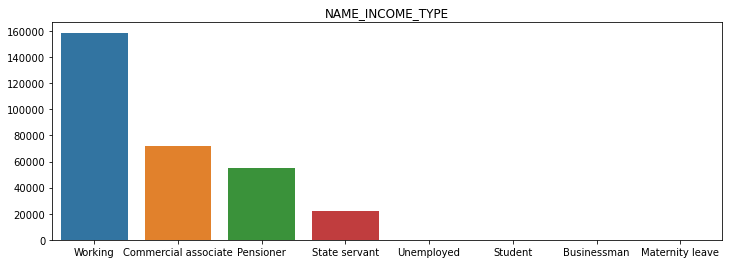

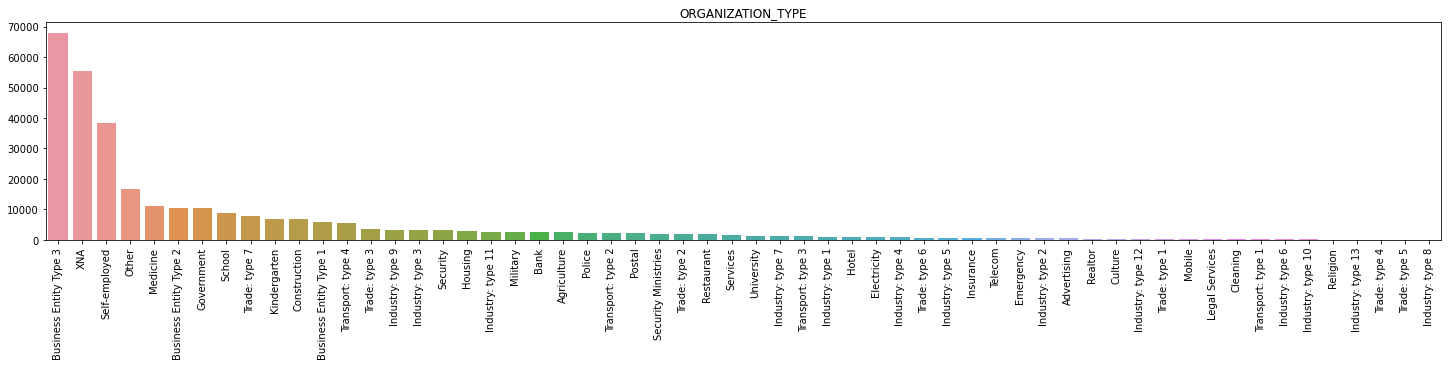

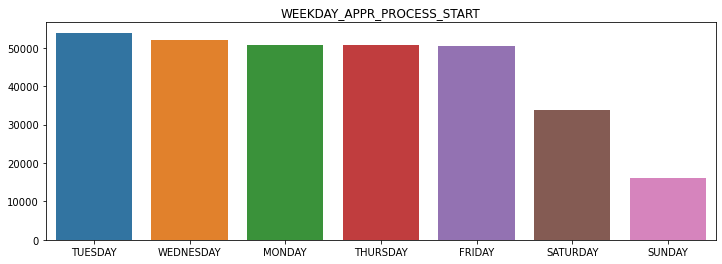

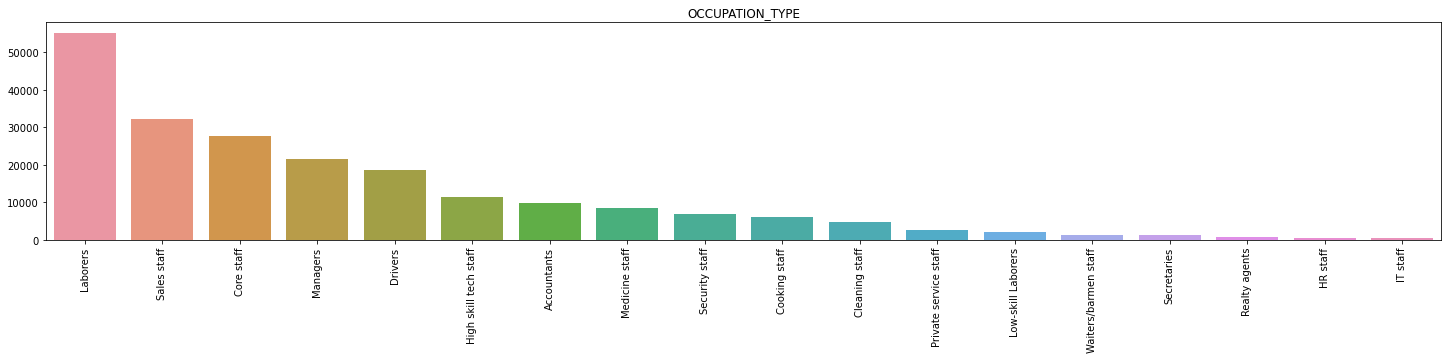

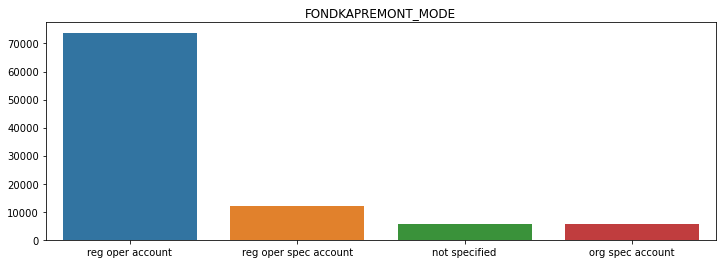

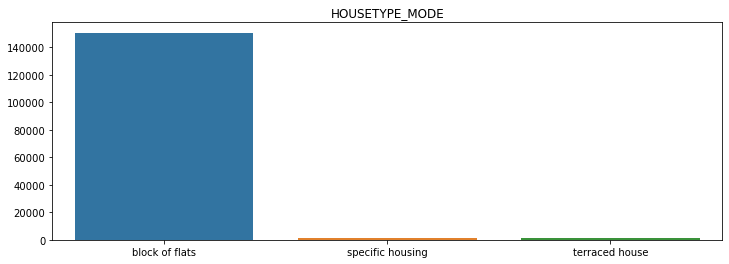

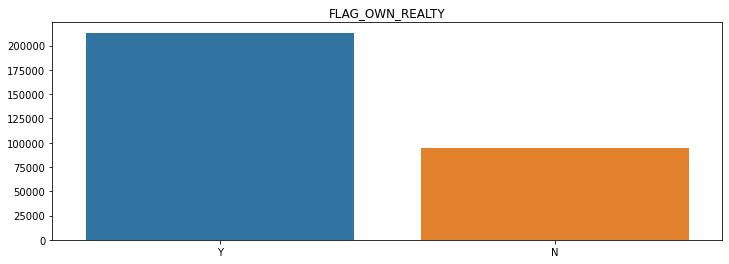

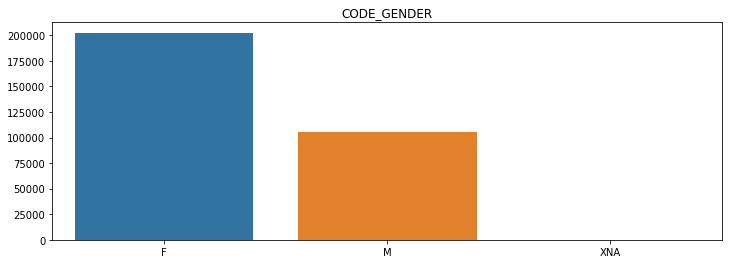

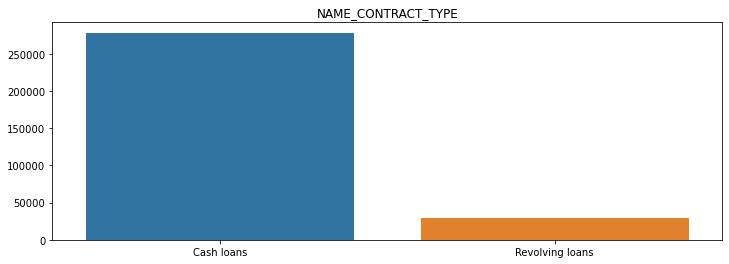

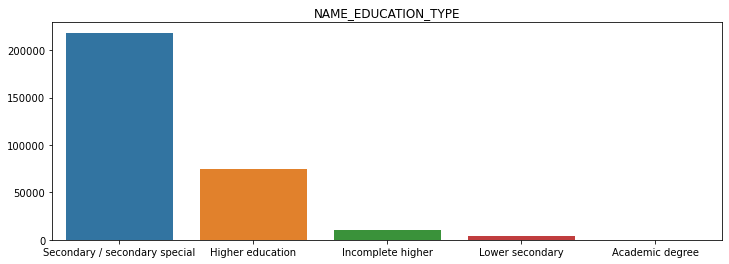

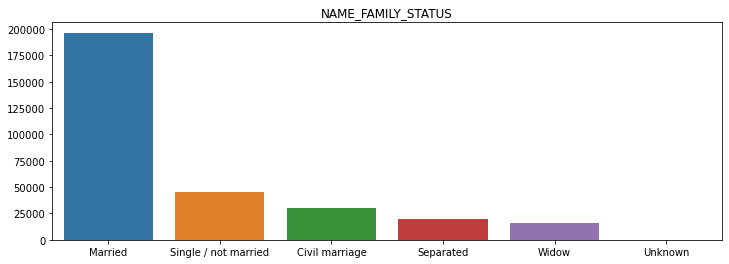

In [14]:

for col in categorical_features: 
    if data[col].nunique() > 10:
        plot_categorical_discrete(data, col, title=col, x_angle=90, size=[25,4])
    else:
        plot_categorical_discrete(data, col, title=col)

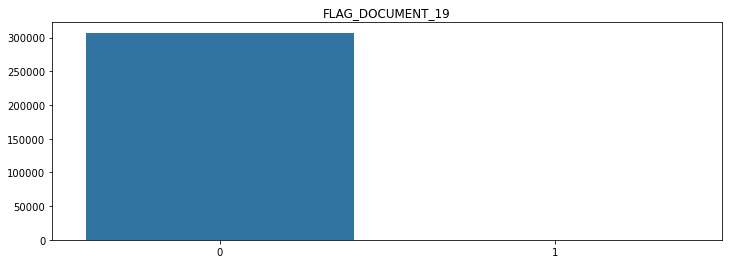

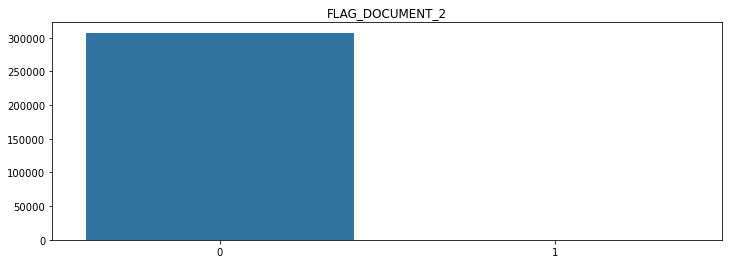

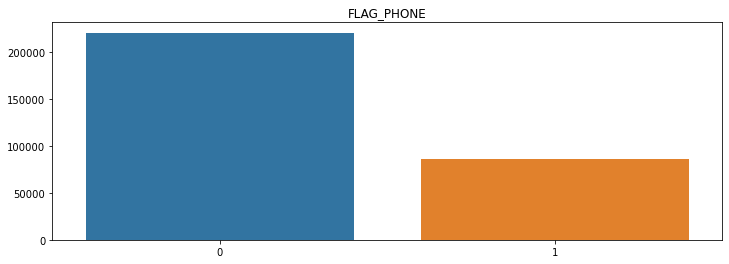

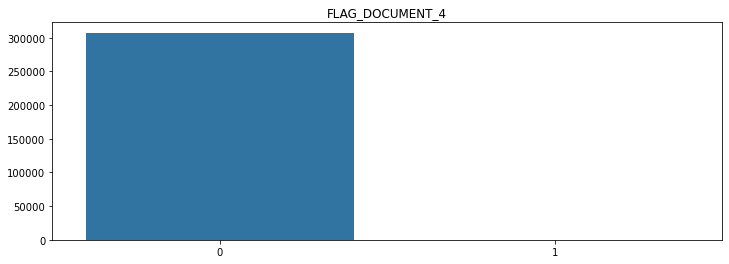

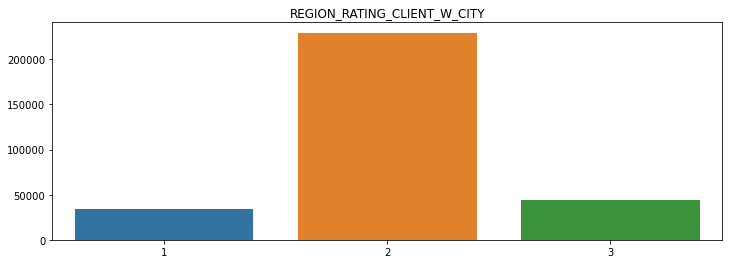

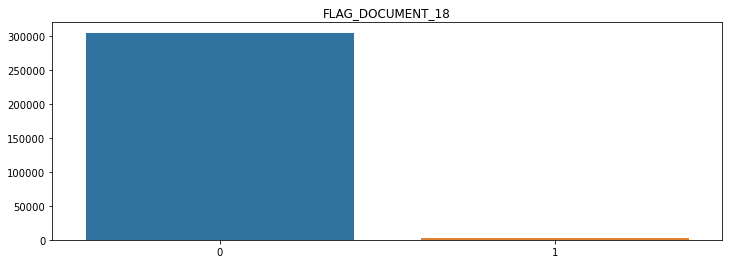

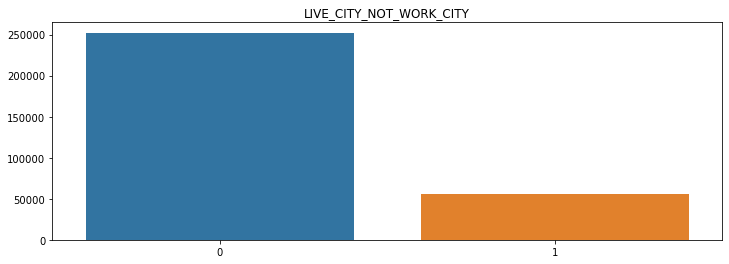

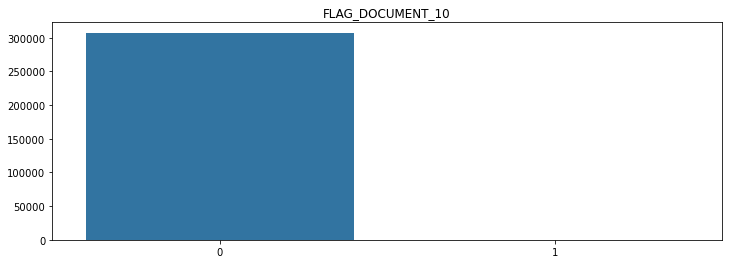

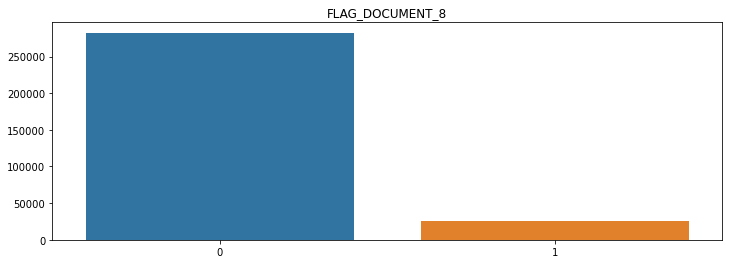

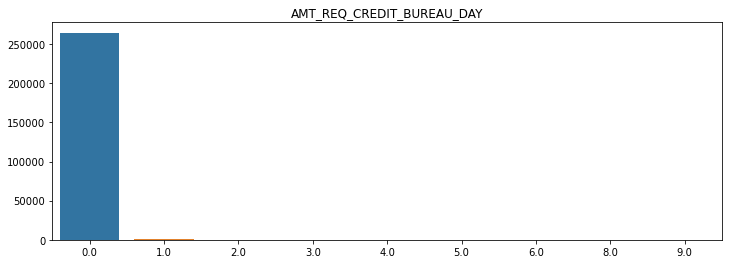

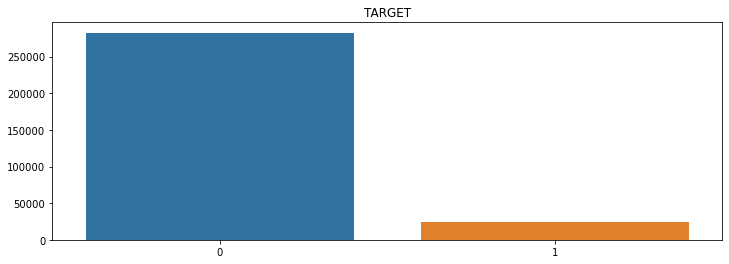

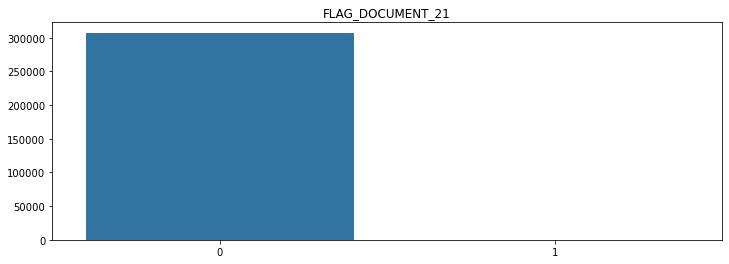

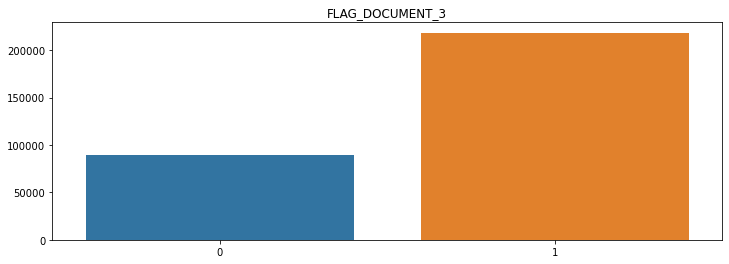

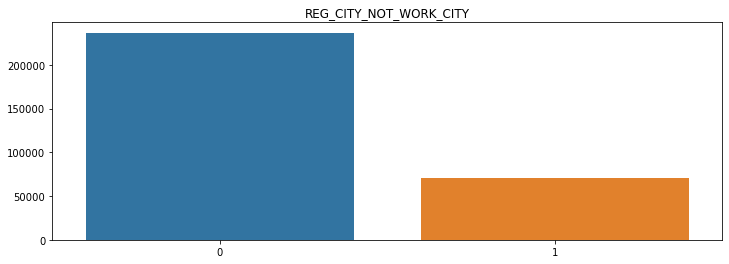

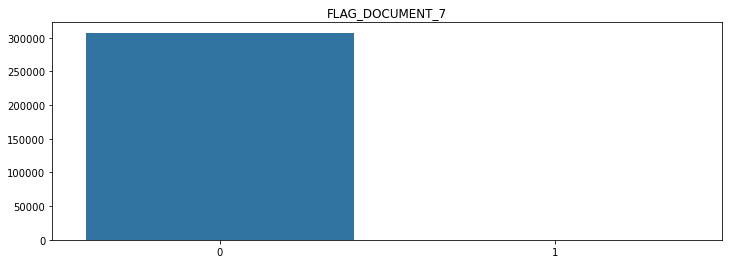

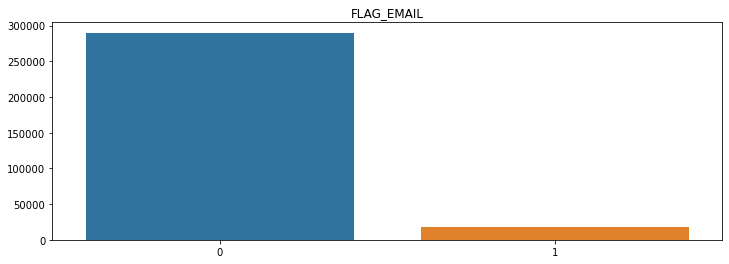

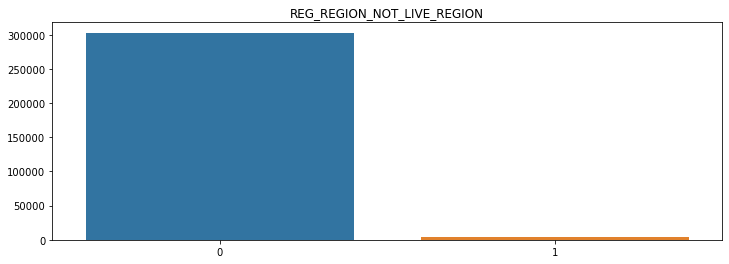

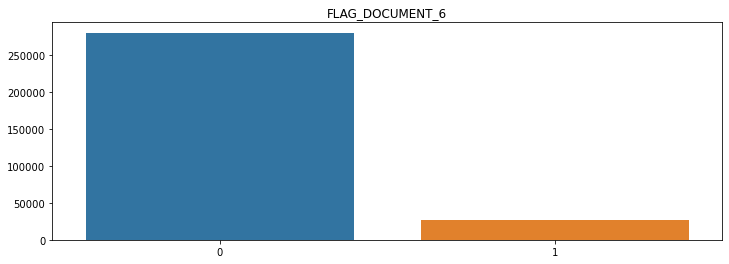

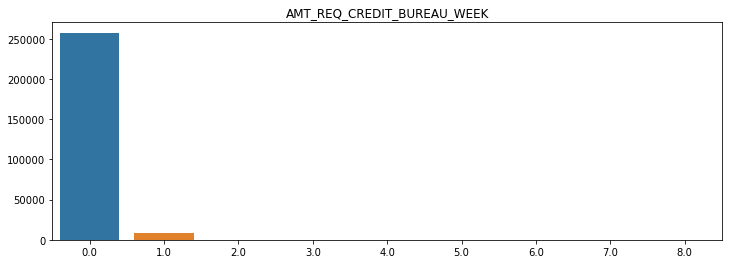

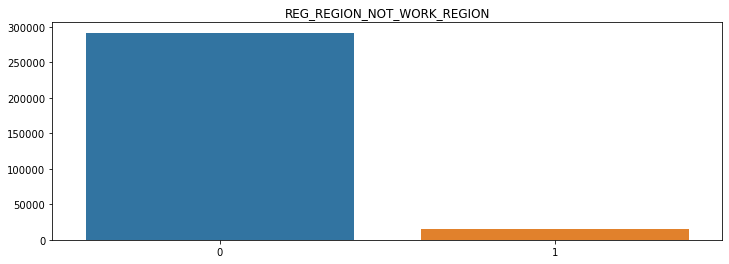

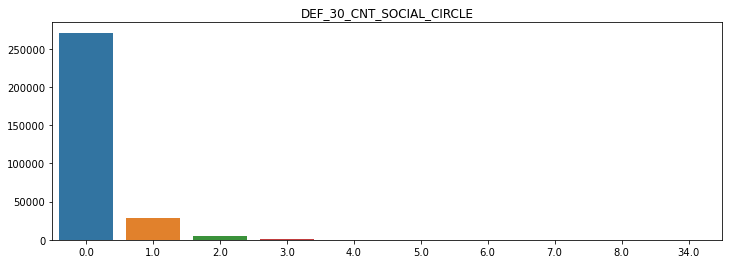

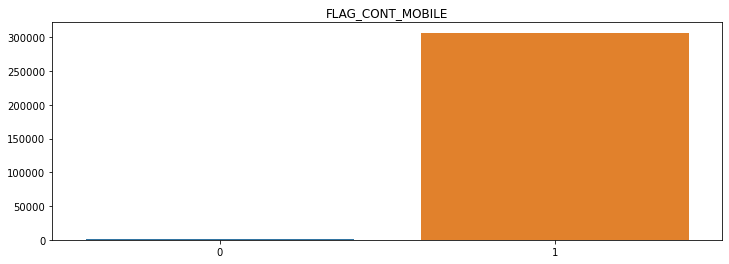

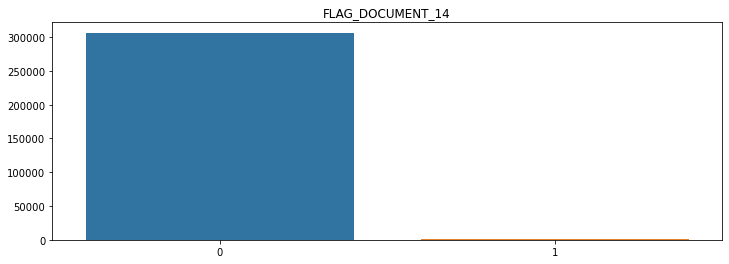

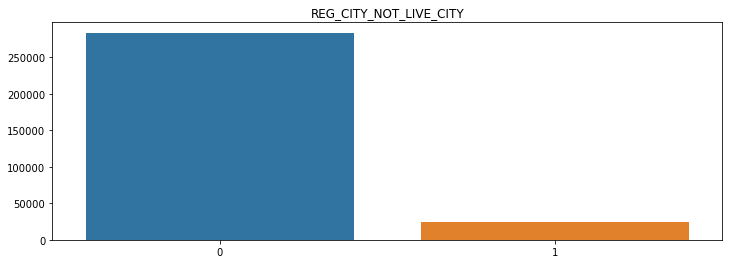

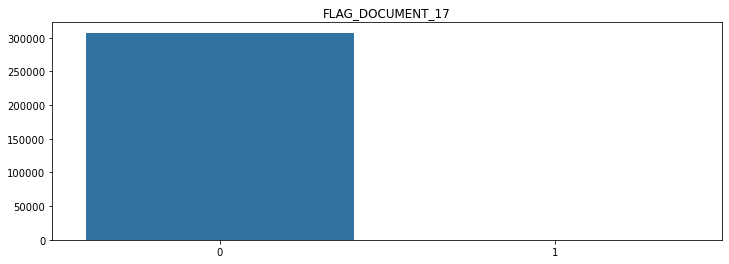

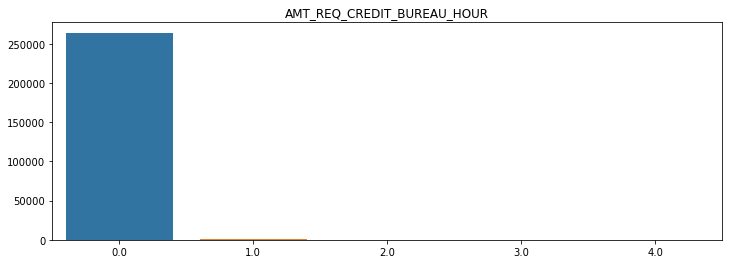

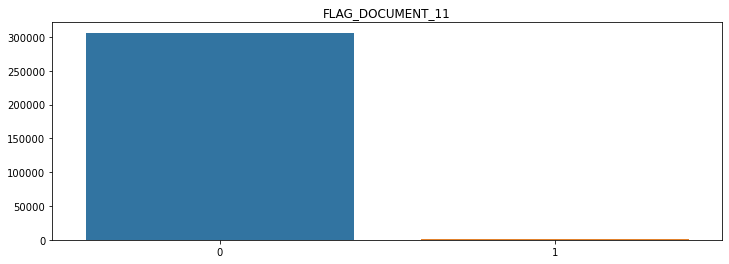

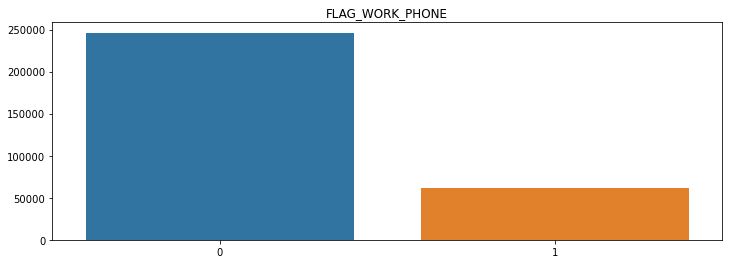

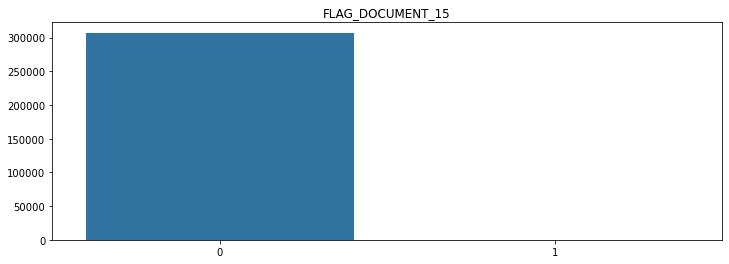

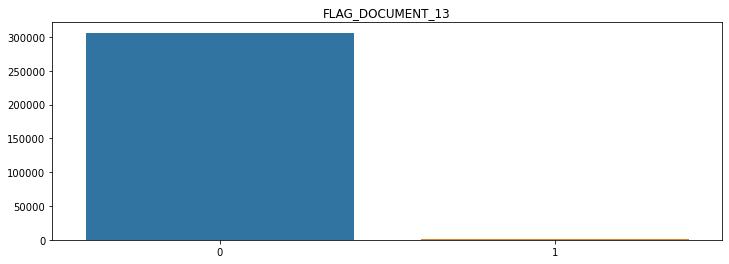

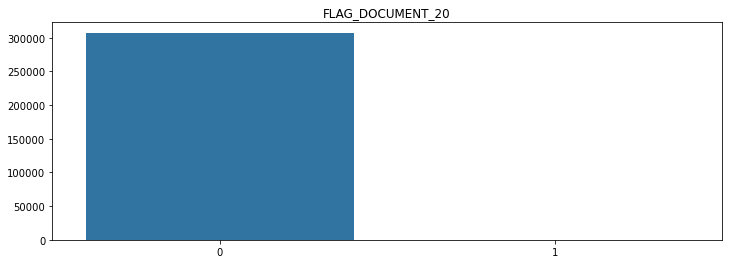

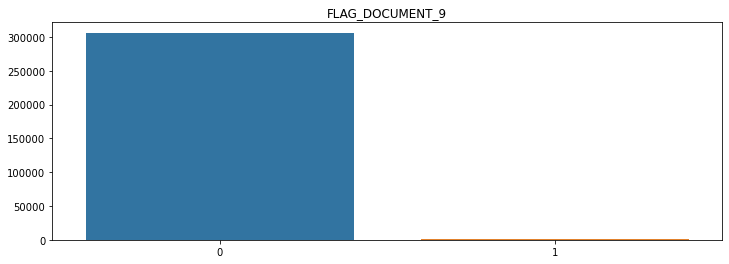

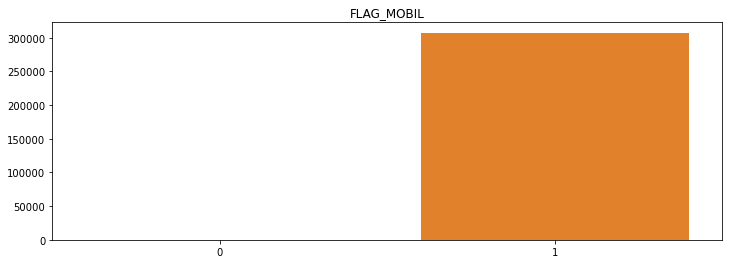

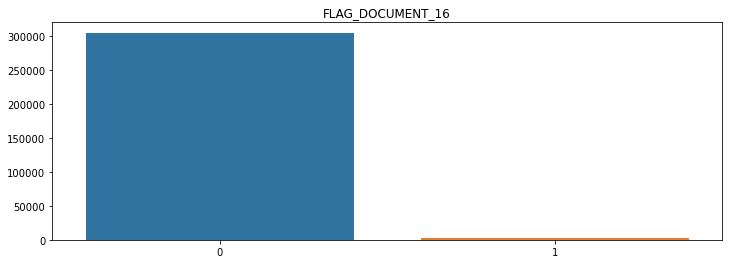

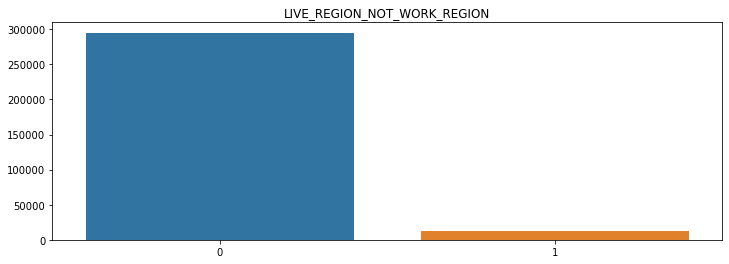

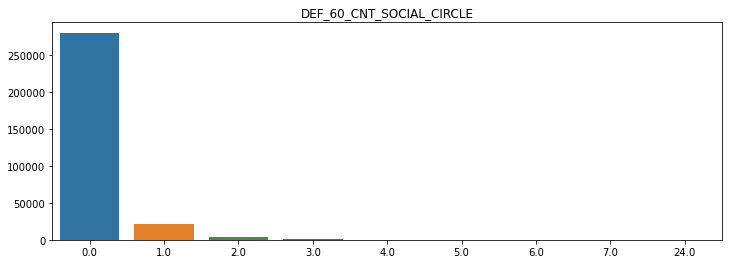

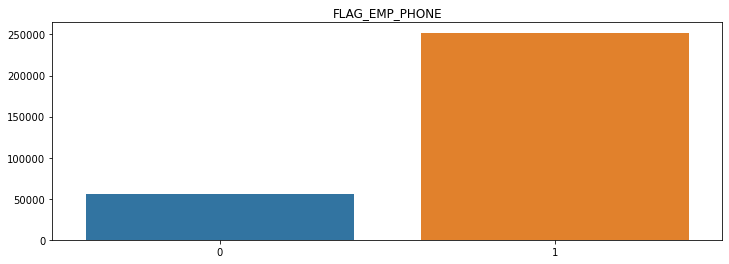

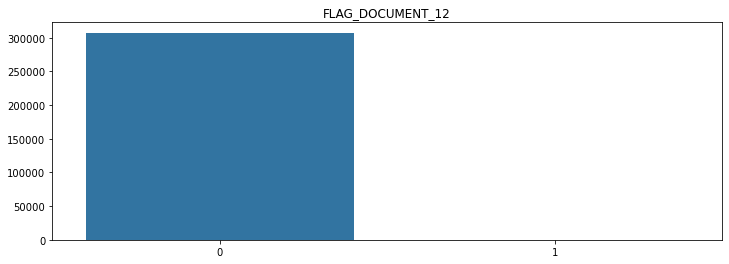

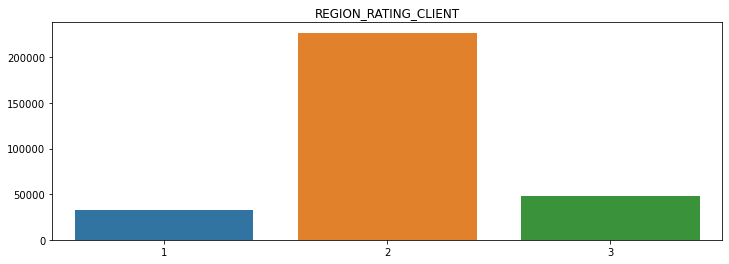

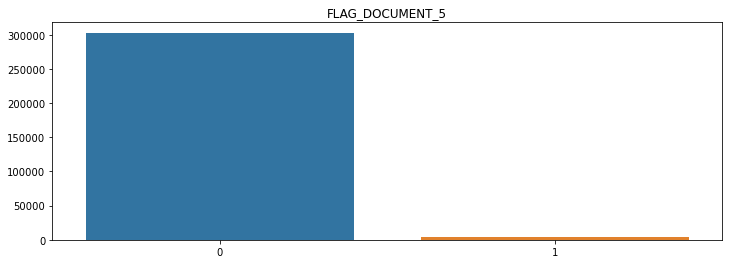

In [15]:
for col in discrete_features:   
    if data[col].nunique() > 10:
        plot_categorical_discrete(data, col, title=col, x_angle=65, size=[25,4])
    else:
        plot_categorical_discrete(data, col, title=col)


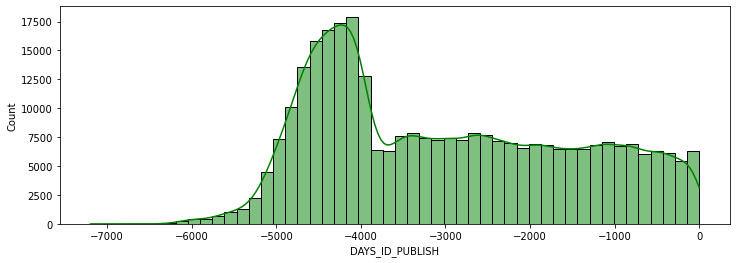

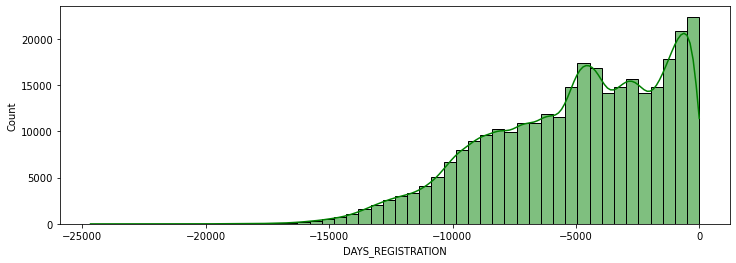

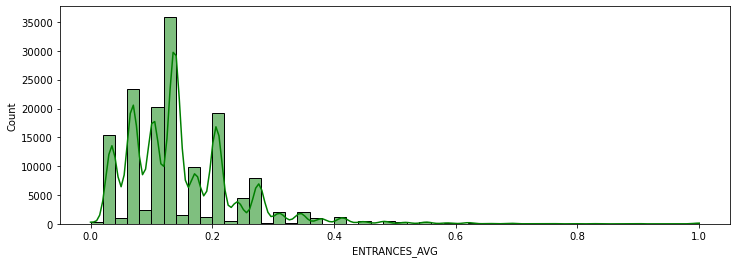

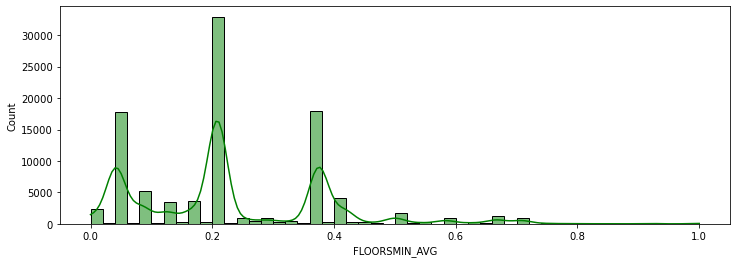

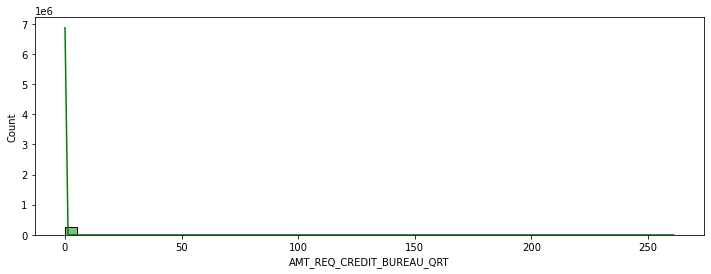

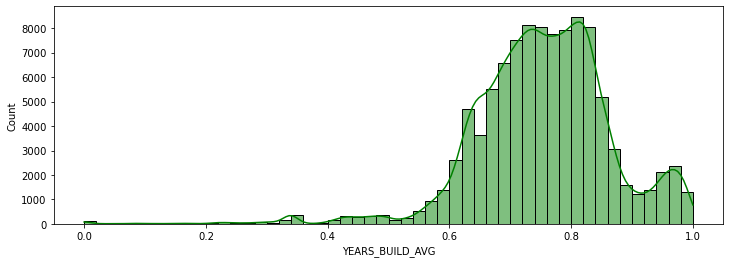

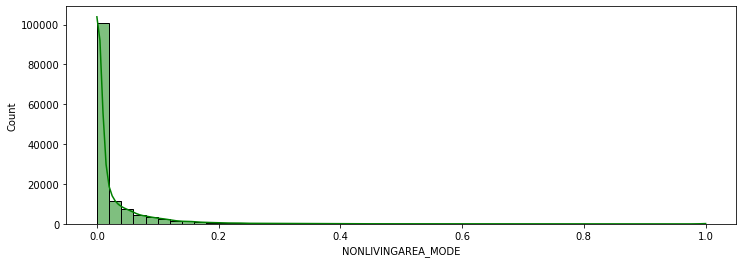

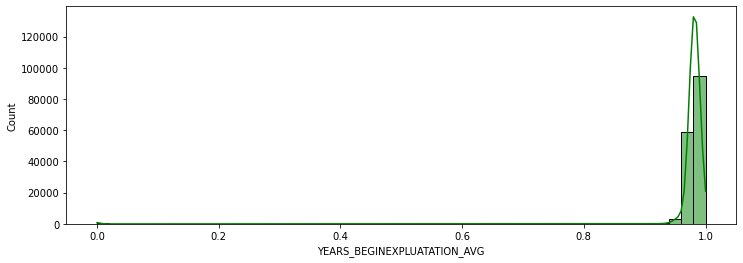

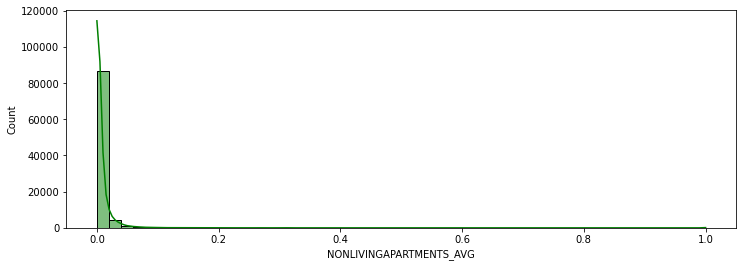

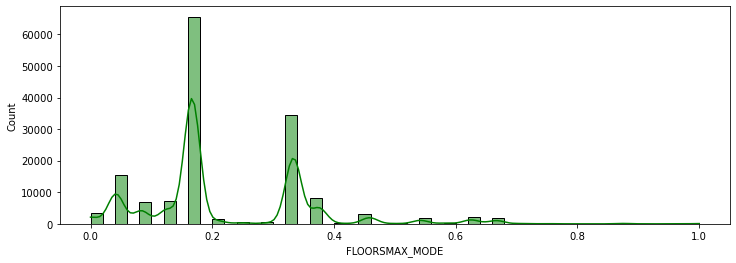

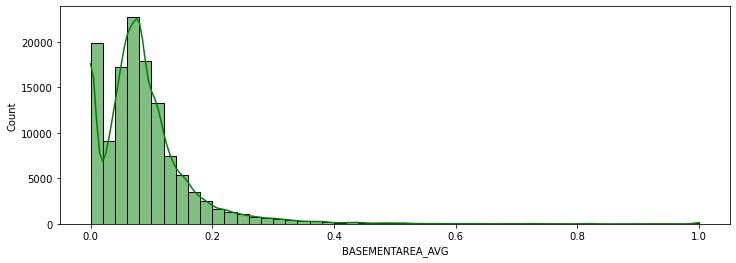

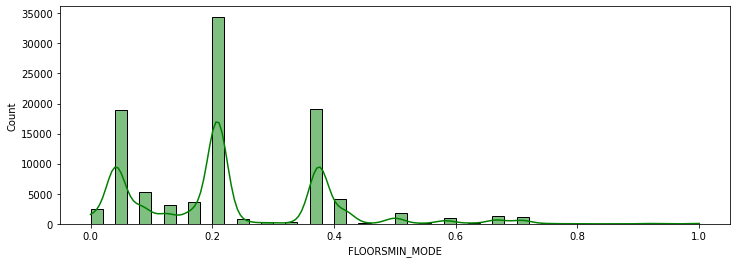

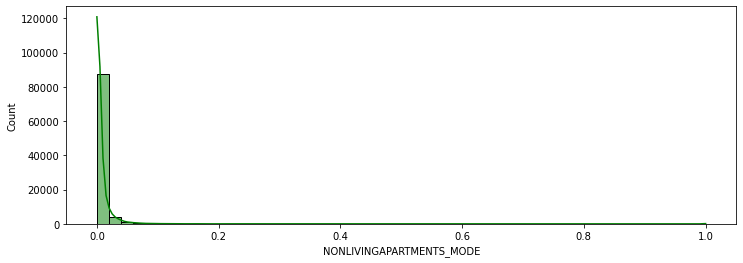

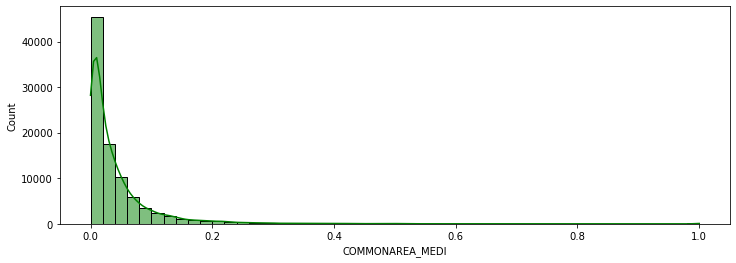

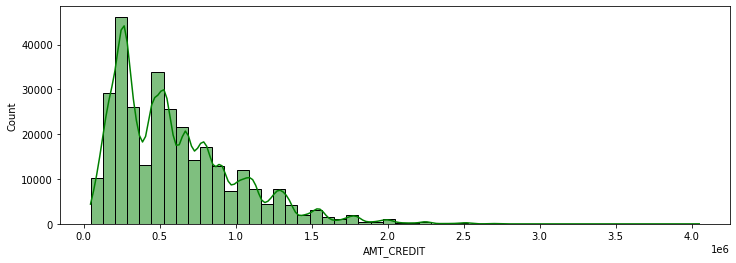

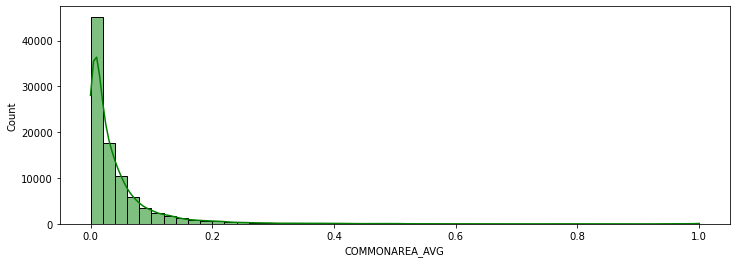

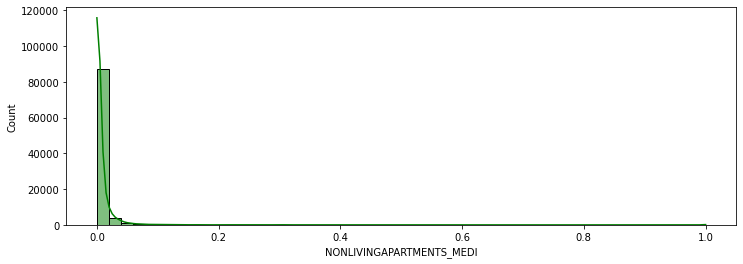

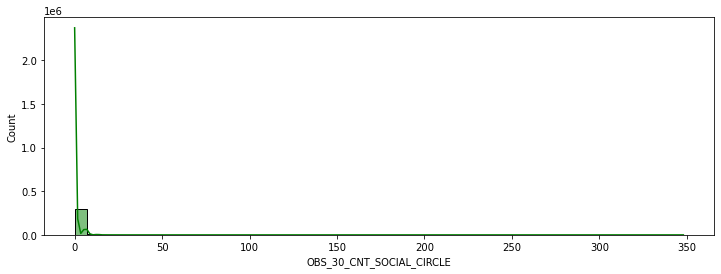

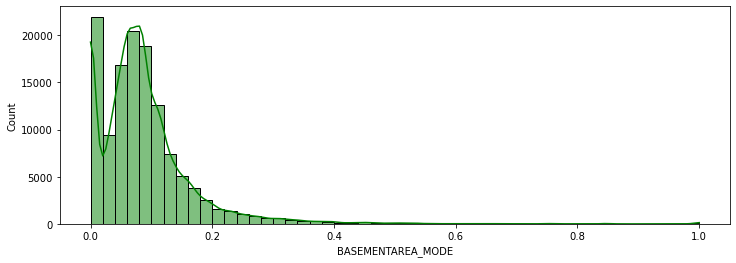

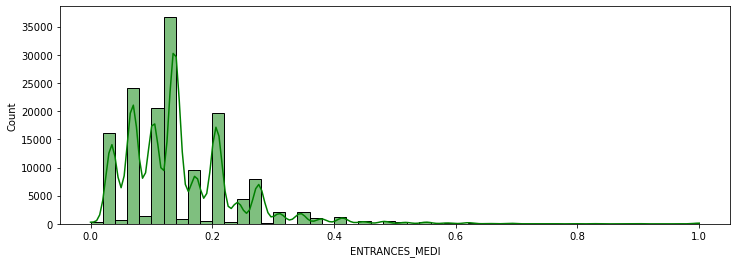

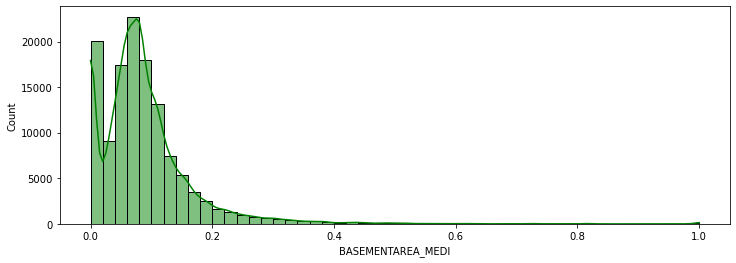

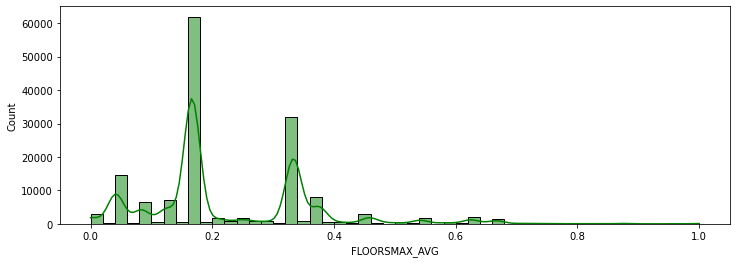

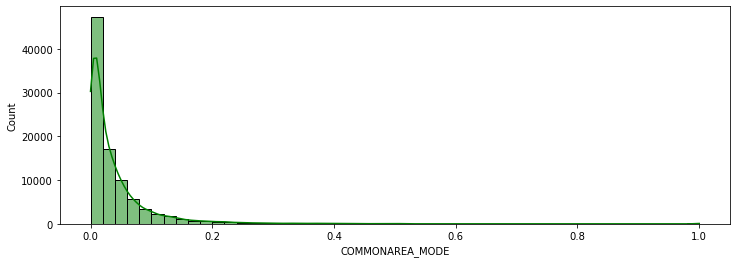

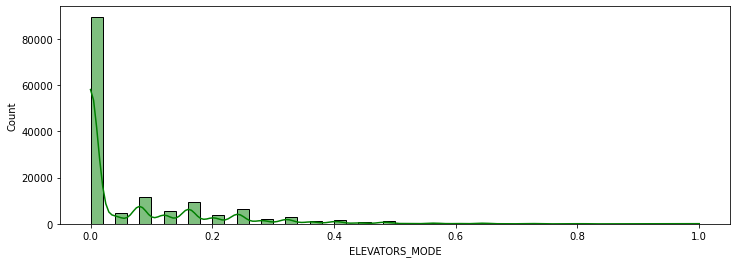

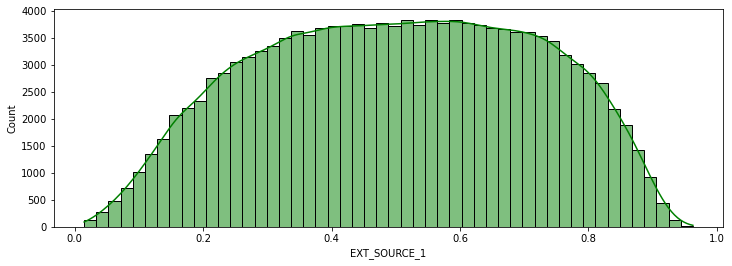

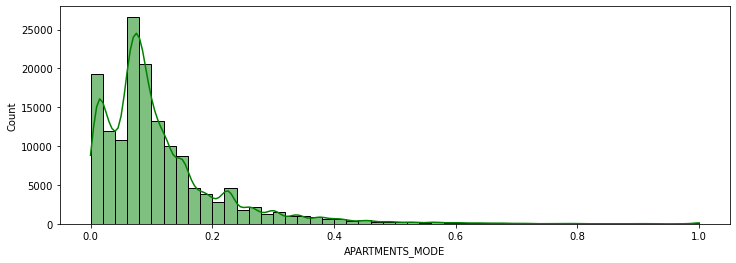

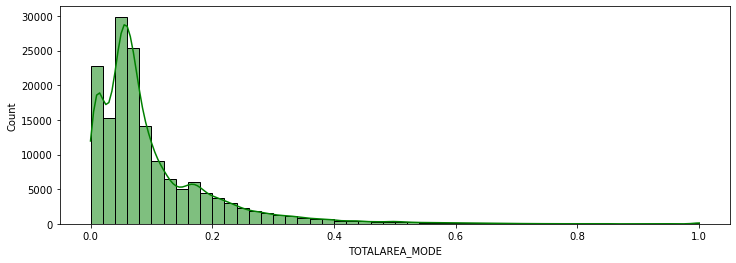

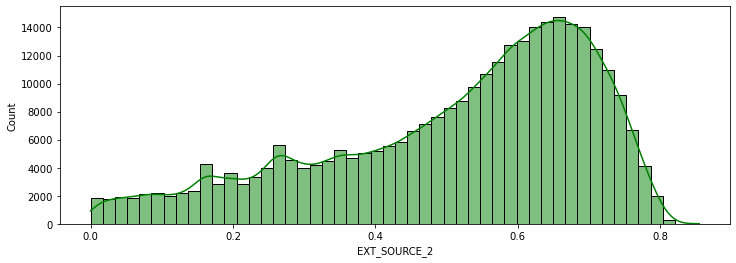

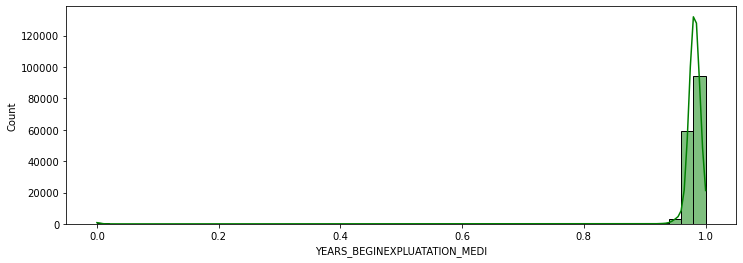

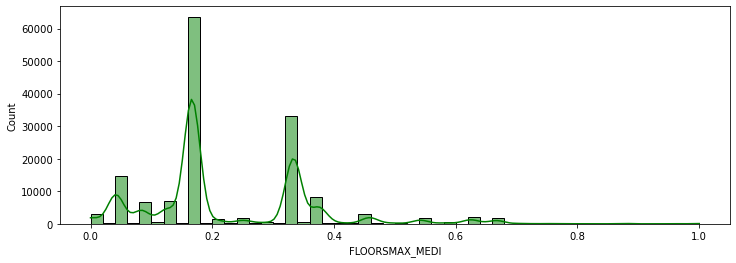

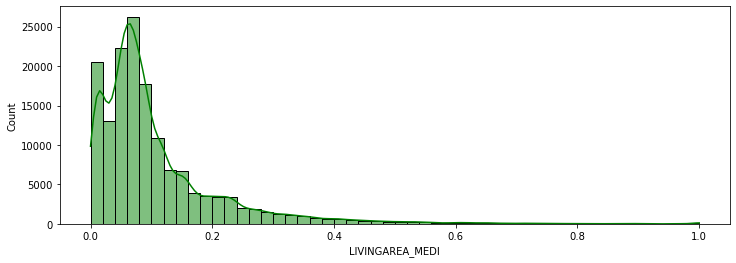

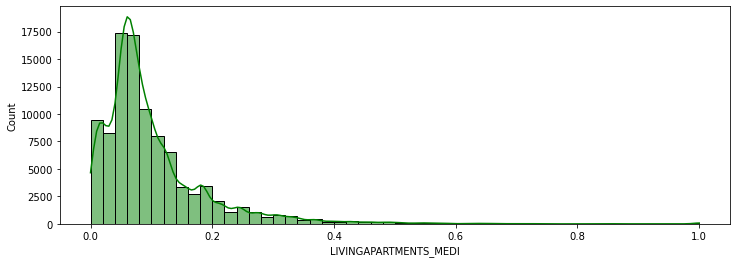

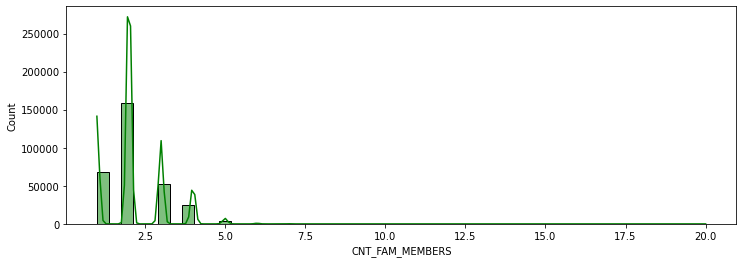

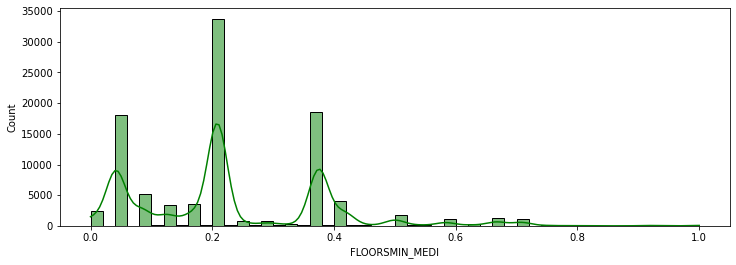

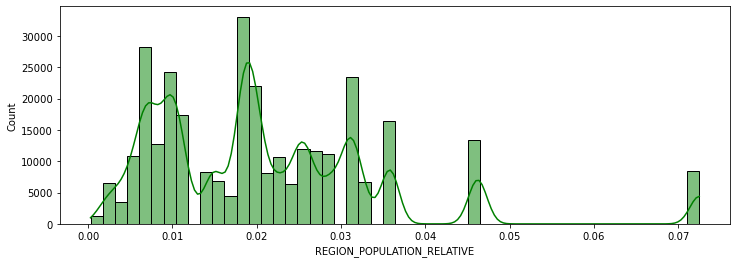

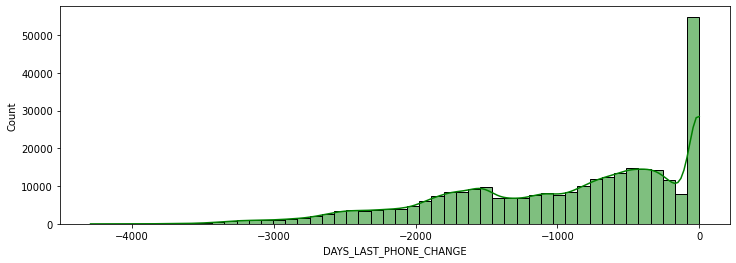

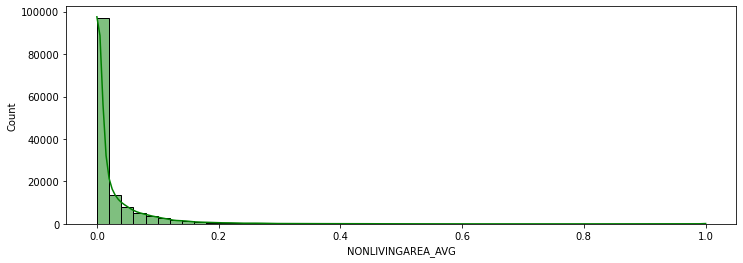

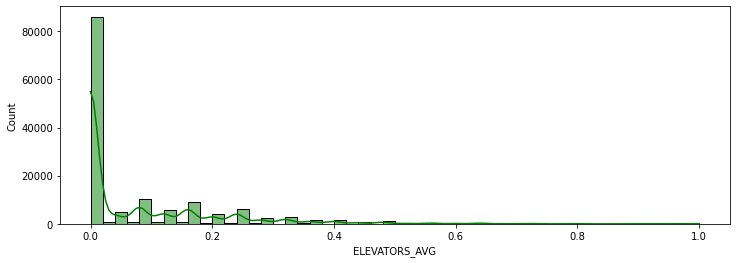

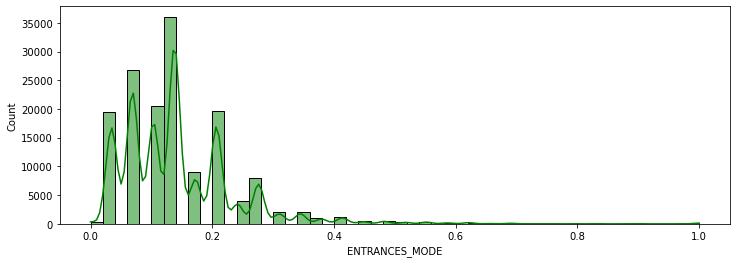

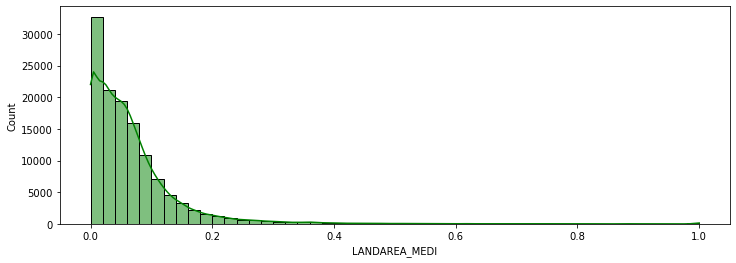

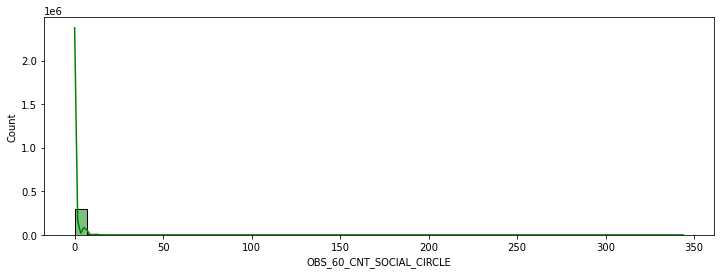

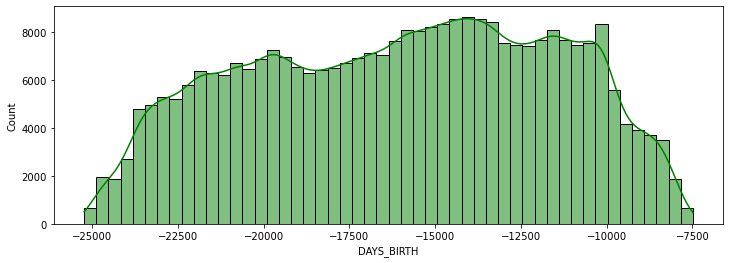

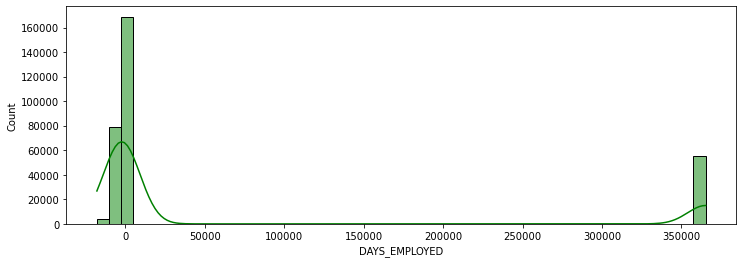

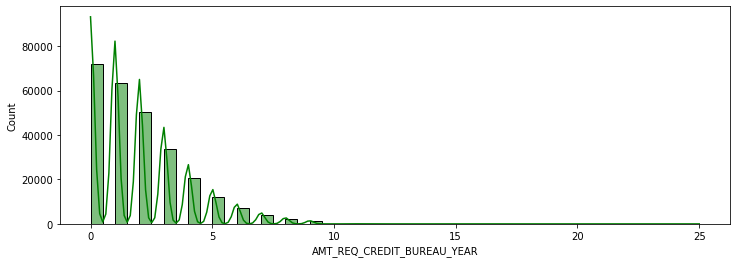

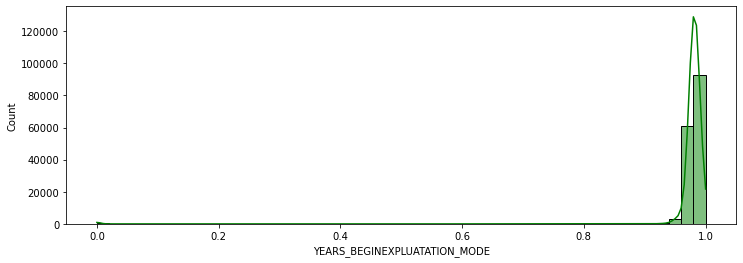

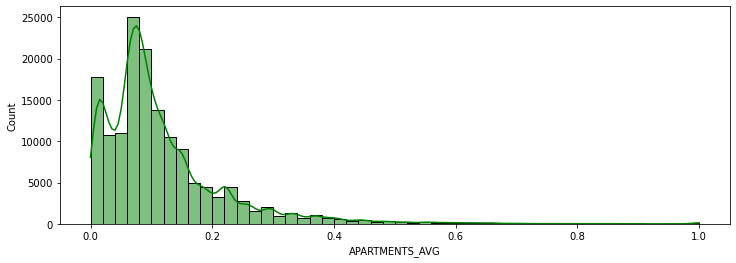

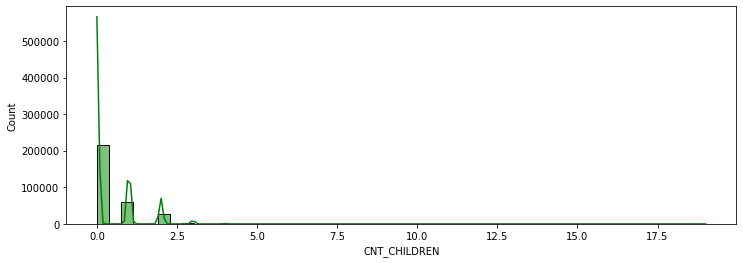

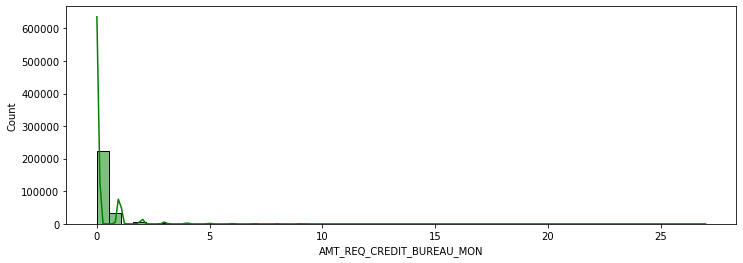

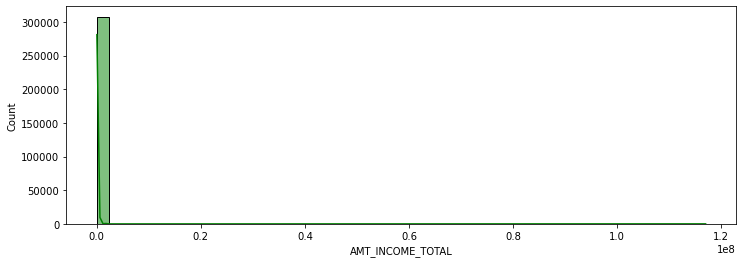

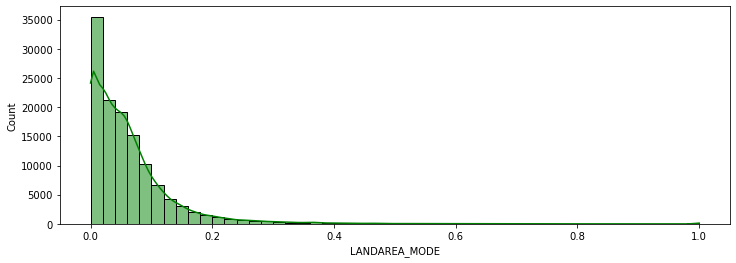

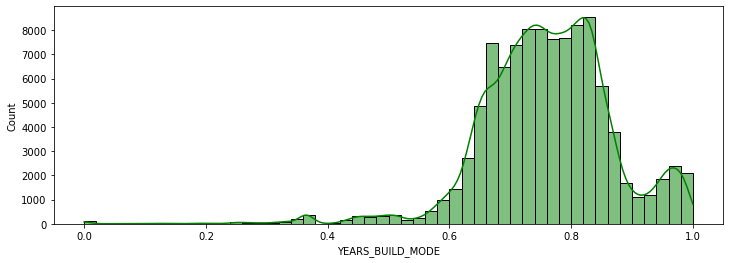

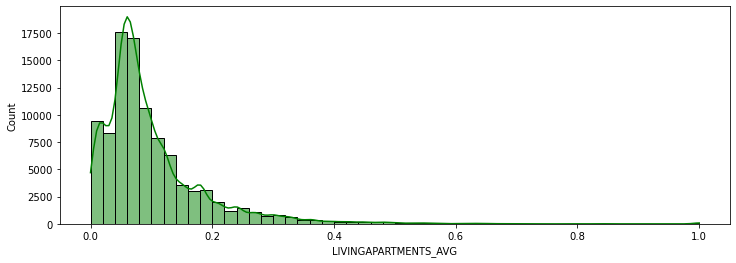

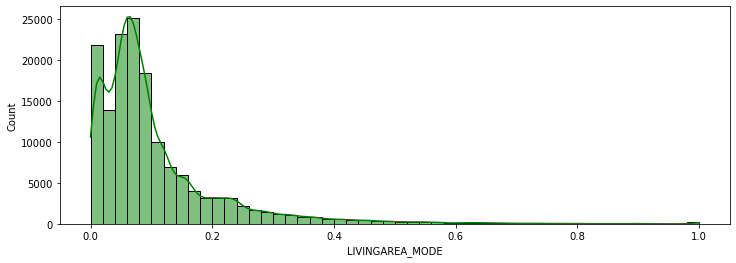

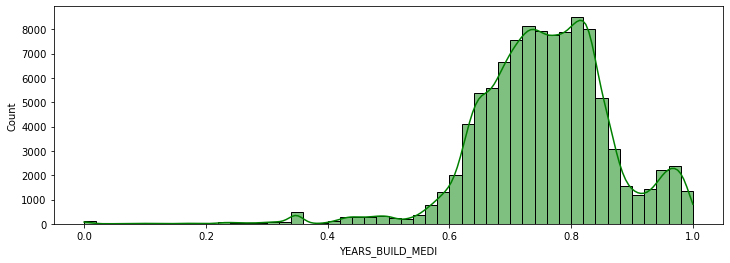

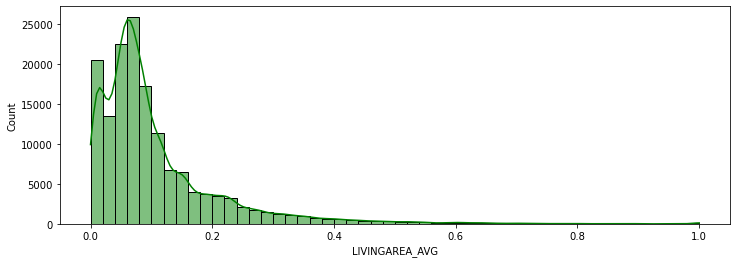

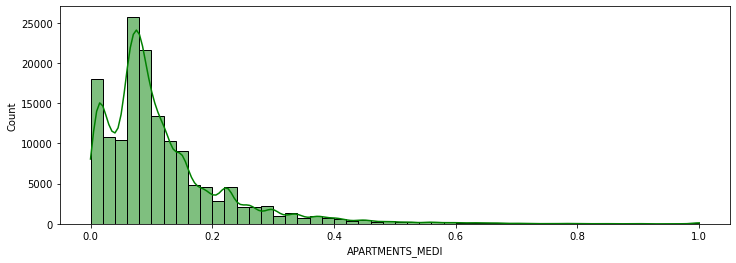

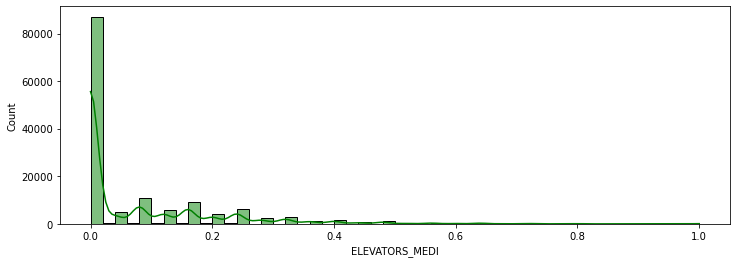

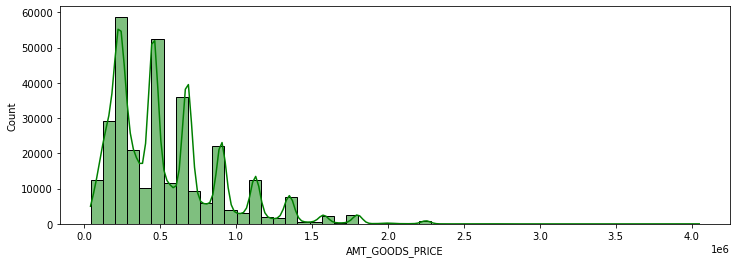

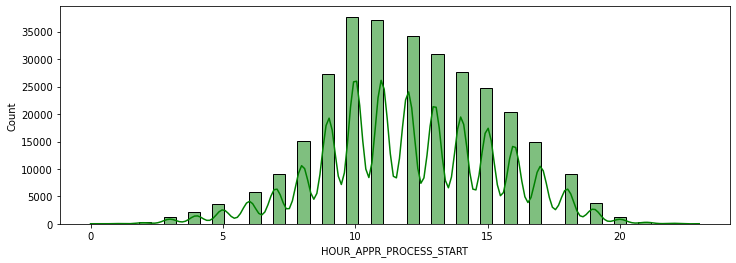

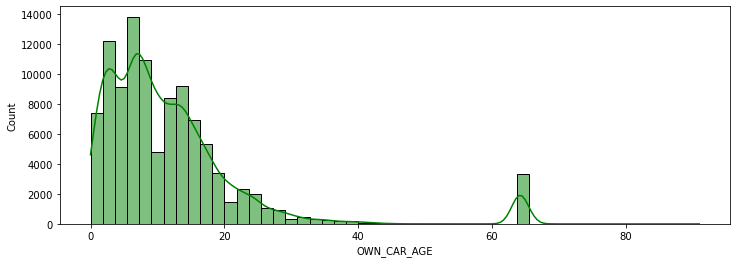

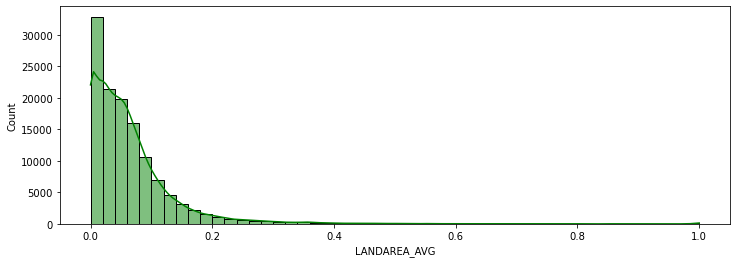

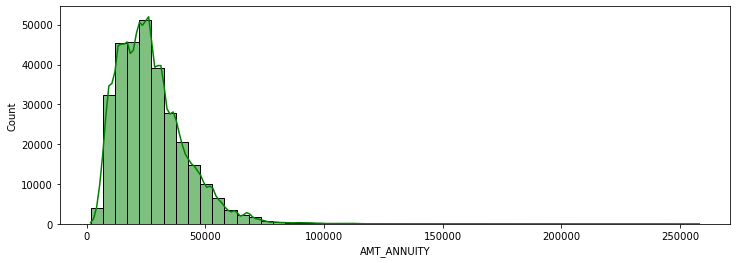

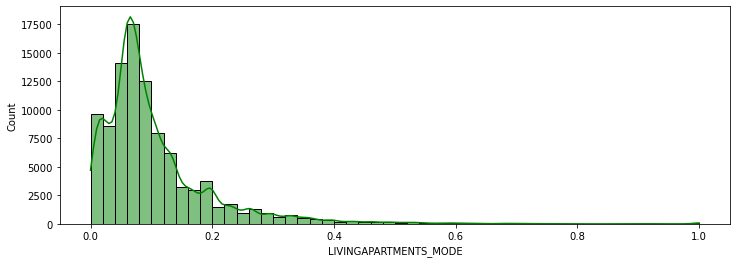

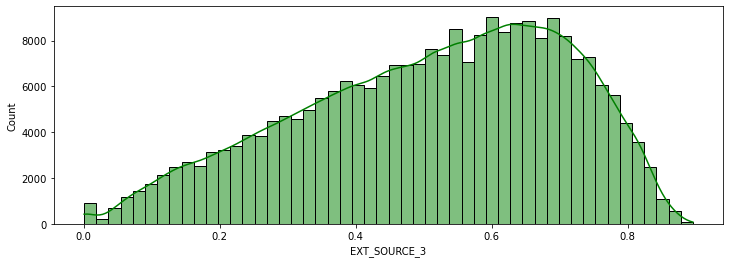

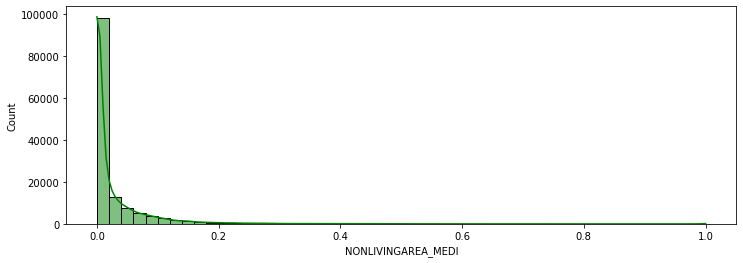

In [16]:
for feature in continuous_features:
    plot_continuous(data, feature)

In [17]:
# fig, ax = plt.subplots(figsize=(16,8))
# ax.scatter(data['AMT_CREDIT'], data['AMT_GOODS_PRICE'])
# ax.set_xlabel('AMT_CREDIT')
# ax.set_ylabel('AMT_GOODS_PRICE')
# plt.show()

In [18]:
100 * data['NAME_CONTRACT_TYPE'].value_counts()/len(data)

Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64

In [19]:
# data['NAME_CONTRACT_TYPE'].plot.bar(rot=0)

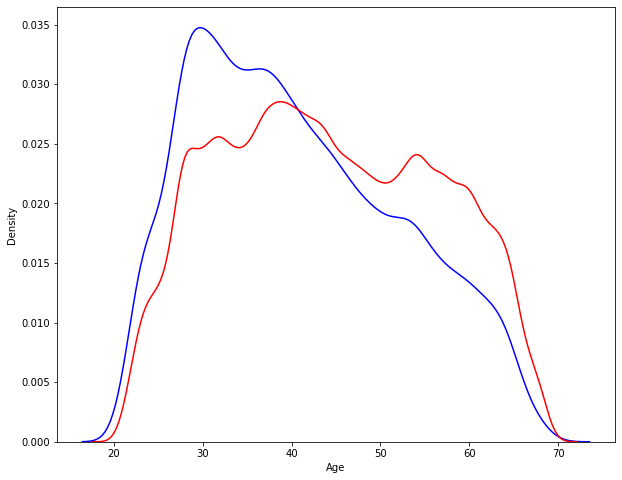

In [20]:
plt.figure(figsize = (10, 8))

sns.kdeplot(data.loc[data['TARGET'] == 1, 'DAYS_BIRTH'] / -365, color='b', label = '123')
sns.kdeplot(data.loc[data['TARGET'] == 0, 'DAYS_BIRTH'] / -365, color='r', label = '234')

plt.xlabel('Age')
plt.show()


From the above plot we can say that people in the age group 25- 35 are less likely to pay back the loan and people in the age group 35-50 number of people who failed to repay the loan is higher in the age group 35-50 are more likely to pay back


EDA conclusions

Target class is imbalanced

There is a trend where the client's age increasing, the probability of client defaulted decreasing

Most of the loans are cash loans

Almost all clients provide mobile phone and the phone numbers are reachable, instead of emails.

Clients registered address are mostly in the same city where they live, but not where their work

Two-third of clients don't have their own car, but two-third of them have their own home

Some annomalities in AMT_INCOME_TOTAL and DAYS_EMPLOYED

In [21]:
data2 = 100*data['AMT_INCOME_TOTAL'].value_counts(bins=20)/len(data)
data2

(-91324.35100000001, 5874367.5]    99.998374
(5874367.5, 11723085.0]             0.000650
(17571802.5, 23420520.0]            0.000325
(11723085.0, 17571802.5]            0.000325
(111151282.5, 117000000.0]          0.000325
(81907695.0, 87756412.5]            0.000000
(76058977.5, 81907695.0]            0.000000
(70210260.0, 76058977.5]            0.000000
(64361542.5, 70210260.0]            0.000000
(58512825.0, 64361542.5]            0.000000
(105302565.0, 111151282.5]          0.000000
(46815390.0, 52664107.5]            0.000000
(40966672.5, 46815390.0]            0.000000
(35117955.0, 40966672.5]            0.000000
(29269237.5, 35117955.0]            0.000000
(23420520.0, 29269237.5]            0.000000
(87756412.5, 93605130.0]            0.000000
(93605130.0, 99453847.5]            0.000000
(99453847.5, 105302565.0]           0.000000
(52664107.5, 58512825.0]            0.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [22]:
# handling annomal values

data['AMT_INCOME_TOTAL'] = data['AMT_INCOME_TOTAL'].apply(lambda x: np.nan if x > 100000000 else x)
data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].apply(lambda x: np.nan if x > 0 else x)

In [23]:
# encoding categorical features

for name in categorical_features:
    encoder = LabelEncoder()
    encoder.fit(list(data[name].values.astype('str')) + list(data_test[name].values.astype('str')))
    data_test[name] = encoder.transform(data_test[name].values.astype('str'))
    data[name] = encoder.transform(data[name].values.astype('str'))

In [24]:
# Replacing nan with mean values
origin_data = data.copy(deep = True)

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
cols = data.columns
data[cols] = imputer.fit_transform(data)
test_cols = data_test.columns
data_test[test_cols] = imputer.fit_transform(data_test)

In [25]:
data_test.shape

(48744, 120)

In [26]:
data_NAME_CONTRACT_TYPE = 100*data['NAME_CONTRACT_TYPE'].value_counts(dropna=False)/len(data)
data_NAME_CONTRACT_TYPE

0.0    90.478715
1.0     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64

In [27]:
plot_data2 = data.loc[data['TARGET'] == 1, 'CODE_GENDER'].value_counts().to_frame()
plot_data2

,CODE_GENDER
0.0,14170
1.0,10655


In [28]:
plot_data2 = data.loc[data['TARGET'] == 0, 'CODE_GENDER'].value_counts()
plot_data2

0.0    188278
1.0     94404
2.0         4
Name: CODE_GENDER, dtype: int64

In [29]:
data_AMT_INCOME_TOTAL = 100*data['AMT_INCOME_TOTAL'].value_counts(bins=10)/len(data)
data_AMT_INCOME_TOTAL


(7675.559, 1823094.0]       99.984391
(1823094.0, 3620538.0]       0.012357
(3620538.0, 5417982.0]       0.001951
(16202646.0, 18000090.0]     0.000325
(12607758.0, 14405202.0]     0.000325
(7215426.0, 9012870.0]       0.000325
(5417982.0, 7215426.0]       0.000325
(14405202.0, 16202646.0]     0.000000
(10810314.0, 12607758.0]     0.000000
(9012870.0, 10810314.0]      0.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [30]:
plot_data2 = data['TARGET'].value_counts().to_frame()
plot_data2

,TARGET
0.0,282686
1.0,24825


In [31]:
data2 = data[['TARGET','CODE_GENDER']].value_counts().to_frame()
data2

0
TARGET CODE_GENDER        
0.0    0.0          188278
       1.0           94404
1.0    0.0           14170
       1.0           10655
0.0    2.0               4

In [32]:
data2 = 100*data['FLAG_OWN_CAR'].value_counts().to_frame()/len(data)
data2

,FLAG_OWN_CAR
0.0,65.989184
1.0,34.010816


In [33]:
data2 = 100*data['FLAG_OWN_REALTY'].value_counts().to_frame()/len(data)
data2

,FLAG_OWN_REALTY
1.0,69.367275
0.0,30.632725


In [34]:
# Regularization

X = data.drop('TARGET', axis=1)
y = data['TARGET']
clf = Lasso(alpha=0.005, max_iter=50000)
scaler = StandardScaler()
clf.fit(scaler.fit_transform(X), y)

final_features = []
for i in range(len(list(X))):
    if clf.coef_[i]:
        if(abs(clf.coef_[i])>0.001):
            print(clf.coef_[i])
            final_features.append(list(X)[i])

final_features

# list(X)

-0.0011350061422112972
0.006814063311825972
-0.0019734749680359732
0.0012325678201269414
0.005873531369054219
0.005743380397737256
0.0017653697894386903
0.0010245394514741255
0.0012464438258722216
-0.010606507410557402
-0.03216737219273424
-0.03239592097754923
0.0013280085845938918
0.004095458878631469


['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'REG_CITY_NOT_LIVE_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_3']

In [35]:
len(final_features)

14

In [36]:
data_dropped_na = origin_data.dropna(subset=final_features, inplace=False)
y = data_dropped_na['TARGET']
X = data_dropped_na[final_features]


In [37]:
# Getting Predictions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [38]:
scaler = StandardScaler()
model = LogisticRegression(max_iter=1000, class_weight='balanced')
fitted_X_train = scaler.fit_transform(X_train)

_ = model.fit(fitted_X_train, y_train)

In [39]:
print('train AUC =', roc_auc_score(y_train, model.predict_proba(fitted_X_train)[:,1]))
print('test AUC =', roc_auc_score(y_test, model.predict_proba(scaler.fit_transform(X_test))[:,1]))

train AUC = 0.7498691855348749
test AUC = 0.7574336248391376


In [41]:
prediction = model.predict_proba(scaler.fit_transform(final_test))
prediction_df = pd.DataFrame(prediction[:,1], index=final_test.index, columns=['TARGET'])
prediction_df.to_csv('submission.csv')

In [42]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  
# from sklearn.neighbors import KNeighborsClassifier  
# from sklearn.naive_bayes import GaussianNB  
# from sklearn.tree import DecisionTreeClassifier  
# from sklearn.svm import SVC 

In [43]:
# KNN_model = KNeighborsClassifier(n_neighbors=5) 

In [44]:
# KNN_model.fit(fitted_X_train, y_train)

In [45]:
# print('train AUC =', roc_auc_score(y_train, KNN_model.predict_proba(fitted_X_train)[:,1]))
# print('test AUC =', roc_auc_score(y_test, KNN_model.predict_proba(scaler.fit_transform(X_test))[:,1]))

In [46]:
# from sklearn.svm import SVC 
# SVC_model = SVC() 
# SVC_model.fit(fitted_X_train, y_train)

In [47]:
# print('test AUC =', roc_auc_score(y_test, SVC_model.predict_proba(scaler.fit_transform(X_test))[:,1]))